In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import time
import logging
from sklearn.datasets import fetch_olivetti_faces

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

data_home='datasets/'
logging.info('Start to load dataset')
faces = fetch_olivetti_faces(data_home=data_home)
logging.info('Done with load dataset')

2021-05-03 17:06:29,291 Start to load dataset
2021-05-03 17:06:29,382 Done with load dataset


In [4]:
X = faces.data
y = faces.target
targets = np.unique(faces.target)
target_names = np.array(["c%d" % t for t in targets])
n_targets = target_names.shape[0]
n_samples, h, w = faces.images.shape
print('Sample count: {}\nTarget count: {}'.format(n_samples, n_targets))
print('Image size: {}x{}\nDataset shape: {}\n'.format(w, h, X.shape))

Sample count: 400
Target count: 40
Image size: 64x64
Dataset shape: (400, 4096)



In [5]:
def plot_gallery(images, titles, h, w, n_row=2, n_col=5):
    """显示图片阵列"""
    plt.figure(figsize=(2 * n_col, 2.2 * n_row), dpi=144)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.01)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.axis('off')

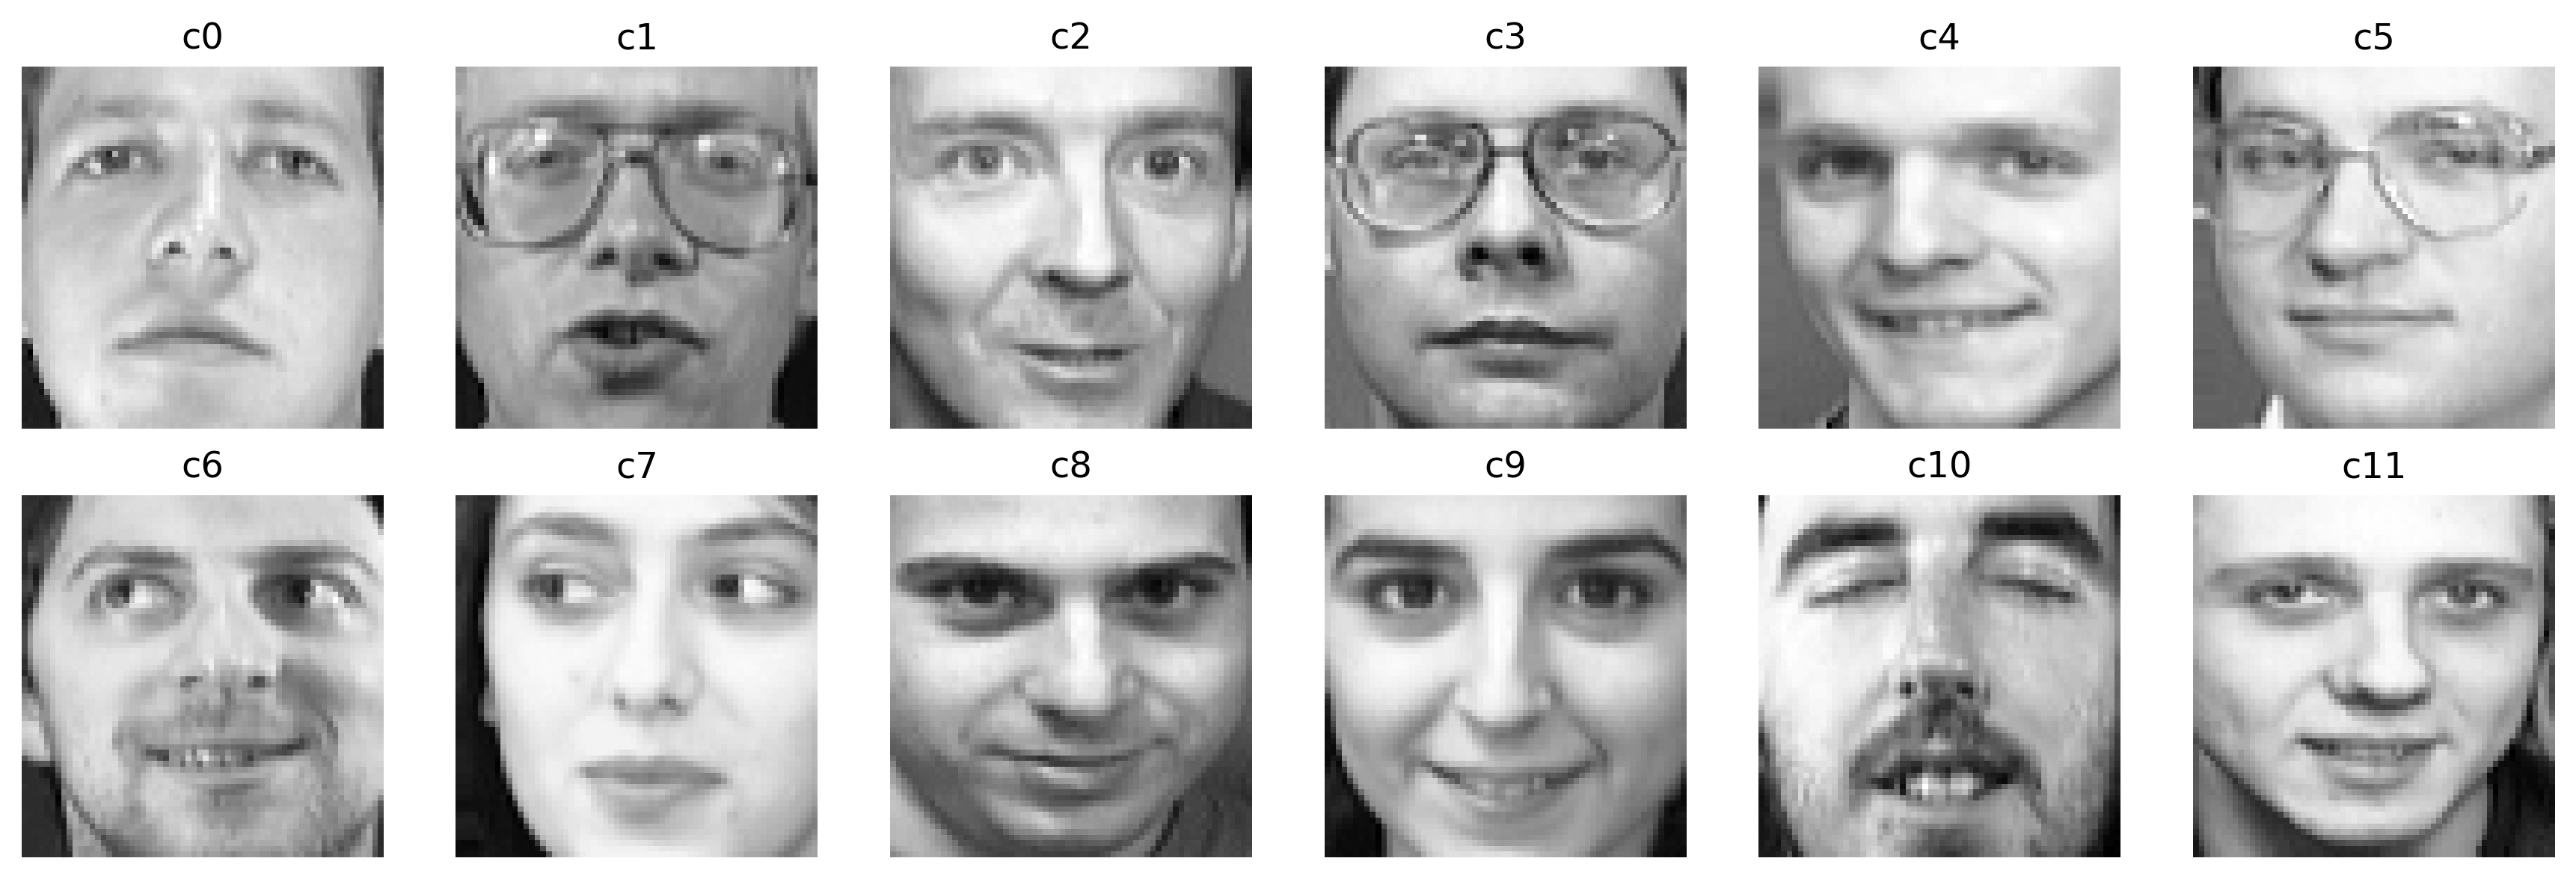

In [6]:
n_row = 2
n_col = 6

sample_images = None
sample_titles = []
for i in range(n_targets):
    people_images = X[y==i]
    people_sample_index = np.random.randint(0, people_images.shape[0], 1)
    people_sample_image = people_images[people_sample_index, :]
    if sample_images is not None:
        sample_images = np.concatenate((sample_images, people_sample_image), axis=0)
    else:
        sample_images = people_sample_image
    sample_titles.append(target_names[i])

plot_gallery(sample_images, sample_titles, h, w, n_row, n_col)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

In [9]:
from sklearn.svm import SVC

start = time.time()
print('Fitting train datasets ...')
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
print('Done in {0:.2f}s'.format(time.time()-start))

Fitting train datasets ...


SVC(class_weight='balanced')

Done in 0.42s


In [11]:
start = time.time()
print("Predicting test dataset ...")
y_pred = clf.predict(X_test)
print('Done in {0:.2f}s'.format(time.time()-start))

Predicting test dataset ...
Done in 0.19s


In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=range(n_targets))
print("confusion matrix:\n")
np.set_printoptions(threshold=2000)
print(cm)

confusion matrix:

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=range(n_targets), target_names=target_names, zero_division=0))

              precision    recall  f1-score   support

          c0       1.00      1.00      1.00         1
          c1       1.00      1.00      1.00         3
          c2       1.00      1.00      1.00         2
          c3       1.00      1.00      1.00         1
          c4       1.00      1.00      1.00         1
          c5       1.00      1.00      1.00         1
          c6       1.00      1.00      1.00         4
          c7       1.00      1.00      1.00         2
          c8       1.00      1.00      1.00         4
          c9       1.00      1.00      1.00         2
         c10       1.00      1.00      1.00         1
         c11       0.00      0.00      0.00         0
         c12       1.00      1.00      1.00         4
         c13       1.00      1.00      1.00         4
         c14       1.00      1.00      1.00         1
         c15       1.00      1.00      1.00         1
         c16       1.00      1.00      1.00         3
         c17       1.00    

In [41]:
from sklearn.decomposition import PCA

print("Exploring explained variance ratio for dataset ...")
candidate_components = range(10, 300, 30)
explained_ratios = []
start = time.time()
for c in candidate_components:
    pca = PCA(n_components=c)
    X_pca = pca.fit_transform(X)
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))
print('Done in {0:.2f}s'.format(time.time()-start))

Exploring explained variance ratio for dataset ...
Done in 2.47s


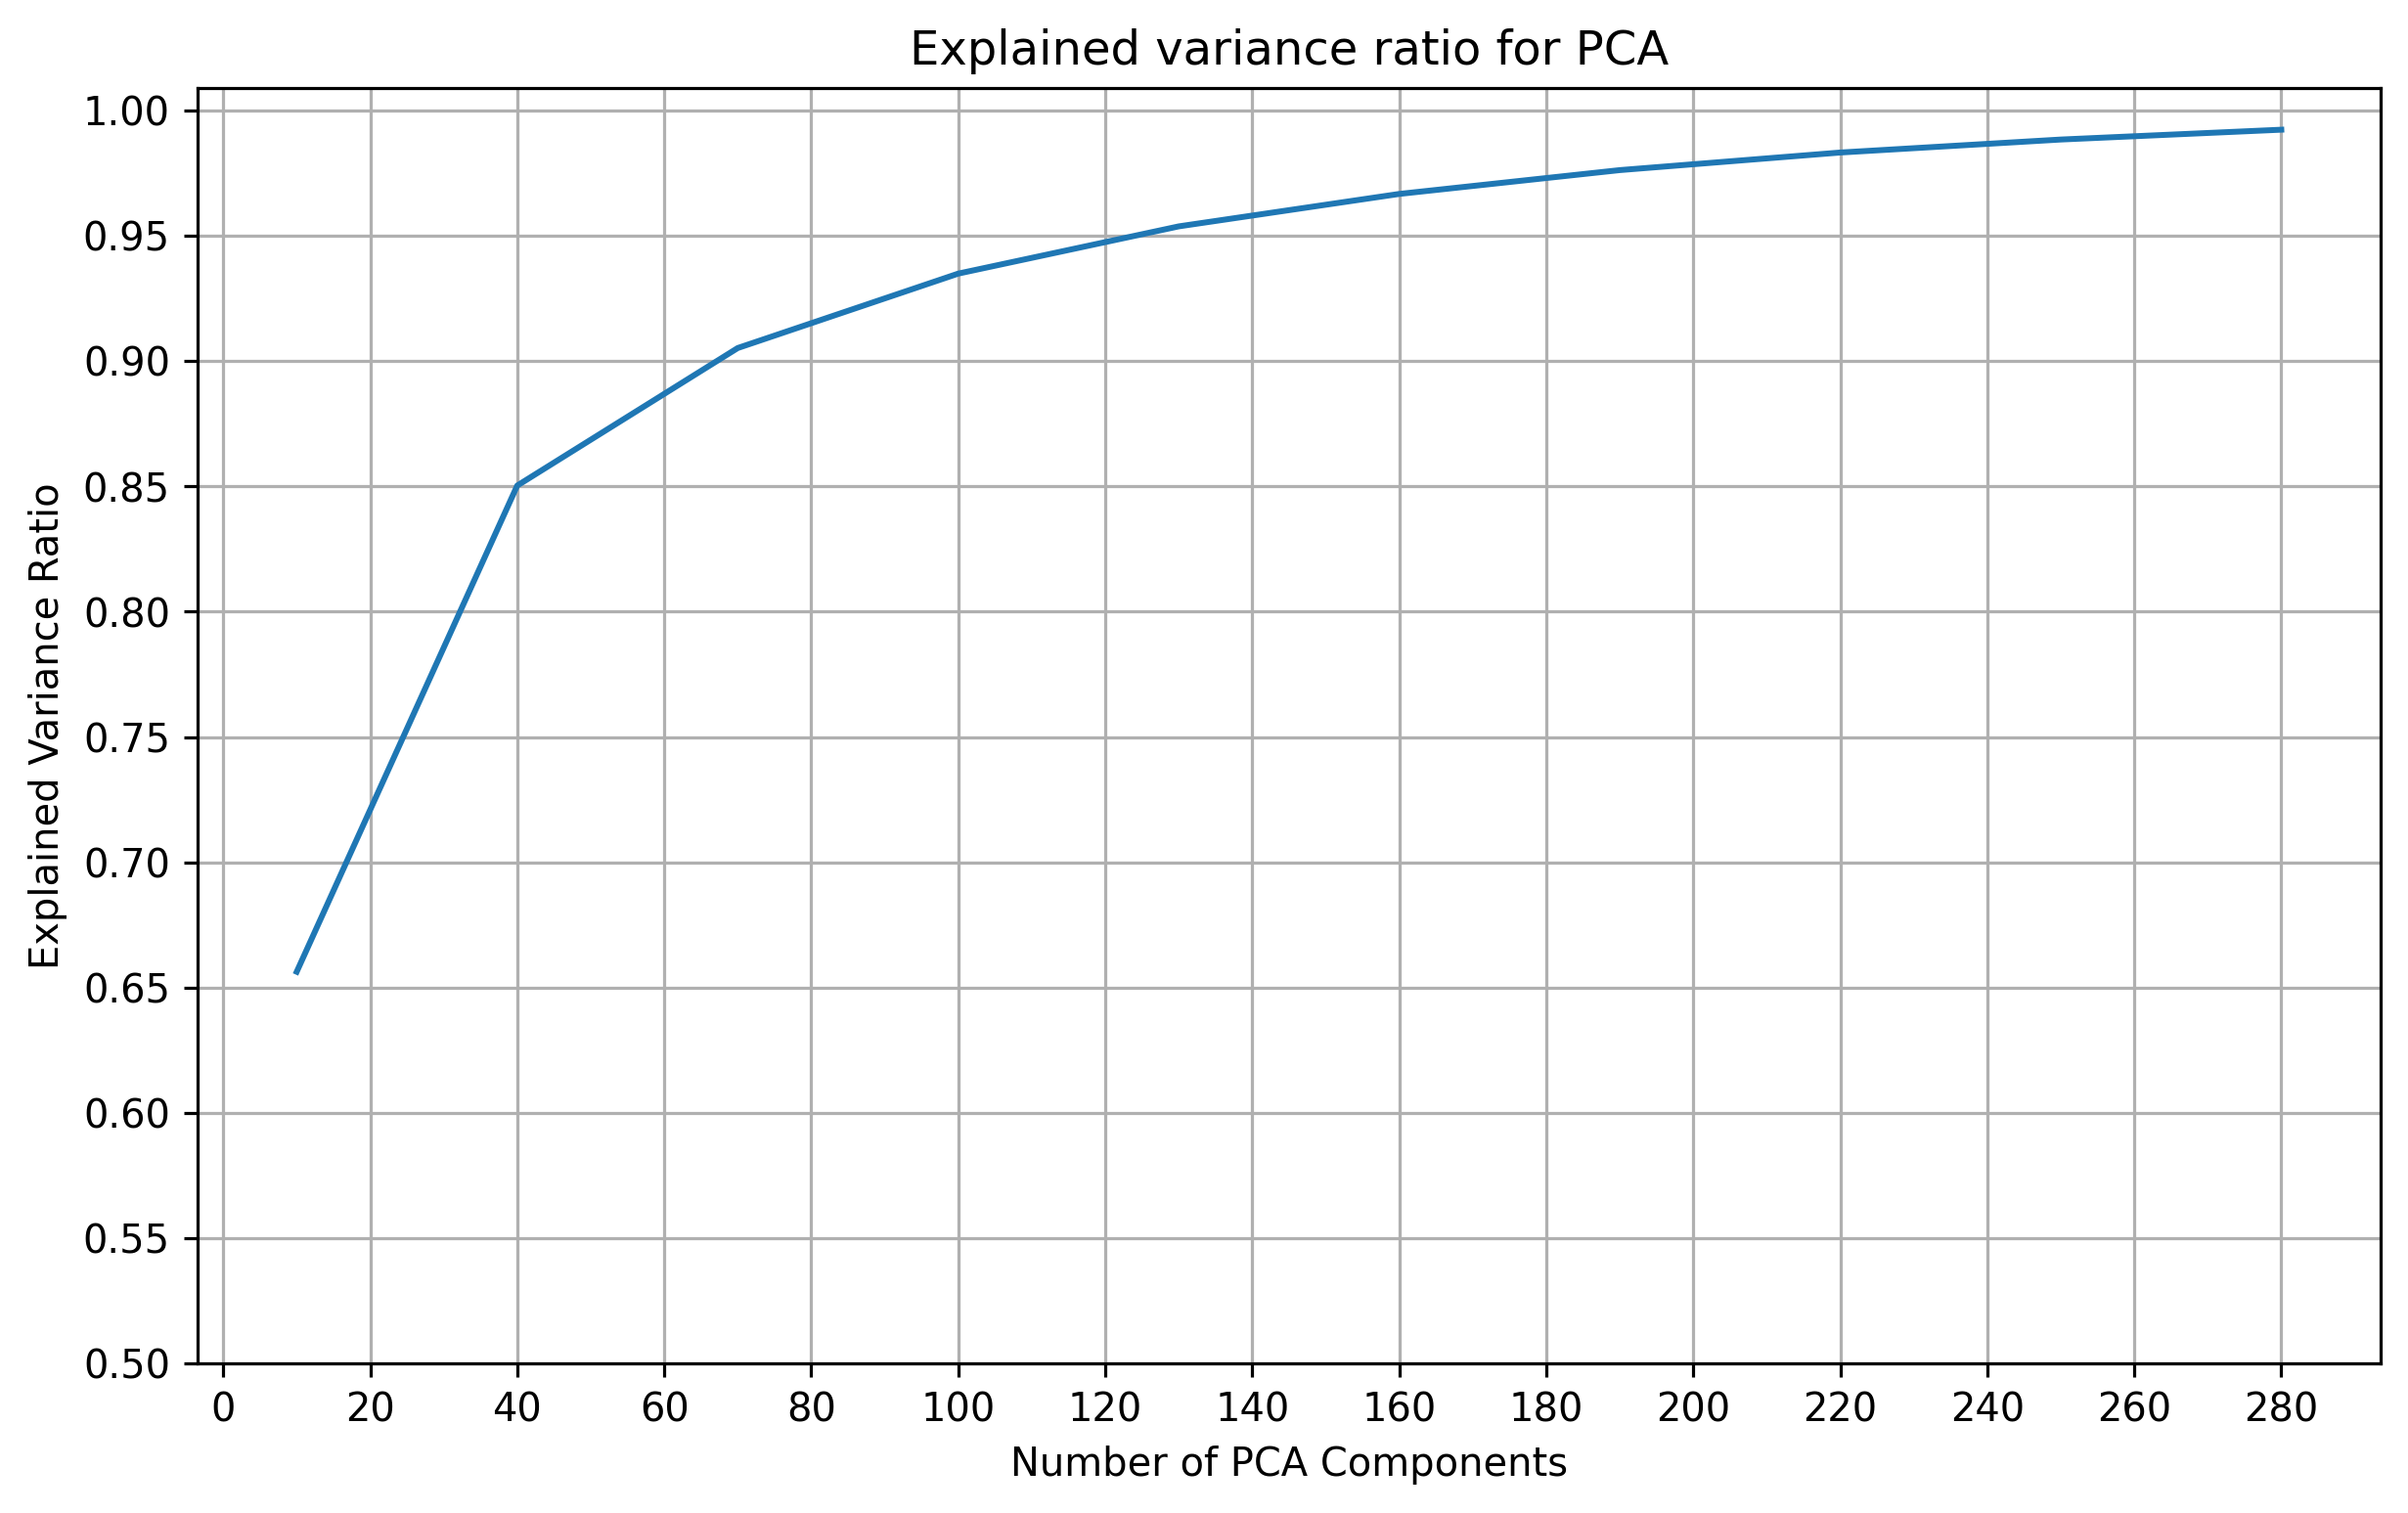

In [42]:
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.5, 1.05, .05))
plt.xticks(np.arange(0, 300, 20));

In [43]:
def title_prefix(prefix, title):
    return "{}: {}".format(prefix, title)

Fitting and projecting on PCA(n_components=140) ...


PCA(n_components=140)

Done in 0.29s
Fitting and projecting on PCA(n_components=75) ...


PCA(n_components=75)

Done in 0.12s
Fitting and projecting on PCA(n_components=37) ...


PCA(n_components=37)

Done in 0.12s
Fitting and projecting on PCA(n_components=19) ...


PCA(n_components=19)

Done in 0.12s
Fitting and projecting on PCA(n_components=8) ...


PCA(n_components=8)

Done in 0.10s
Plotting sample image with different number of PCA conpoments ...


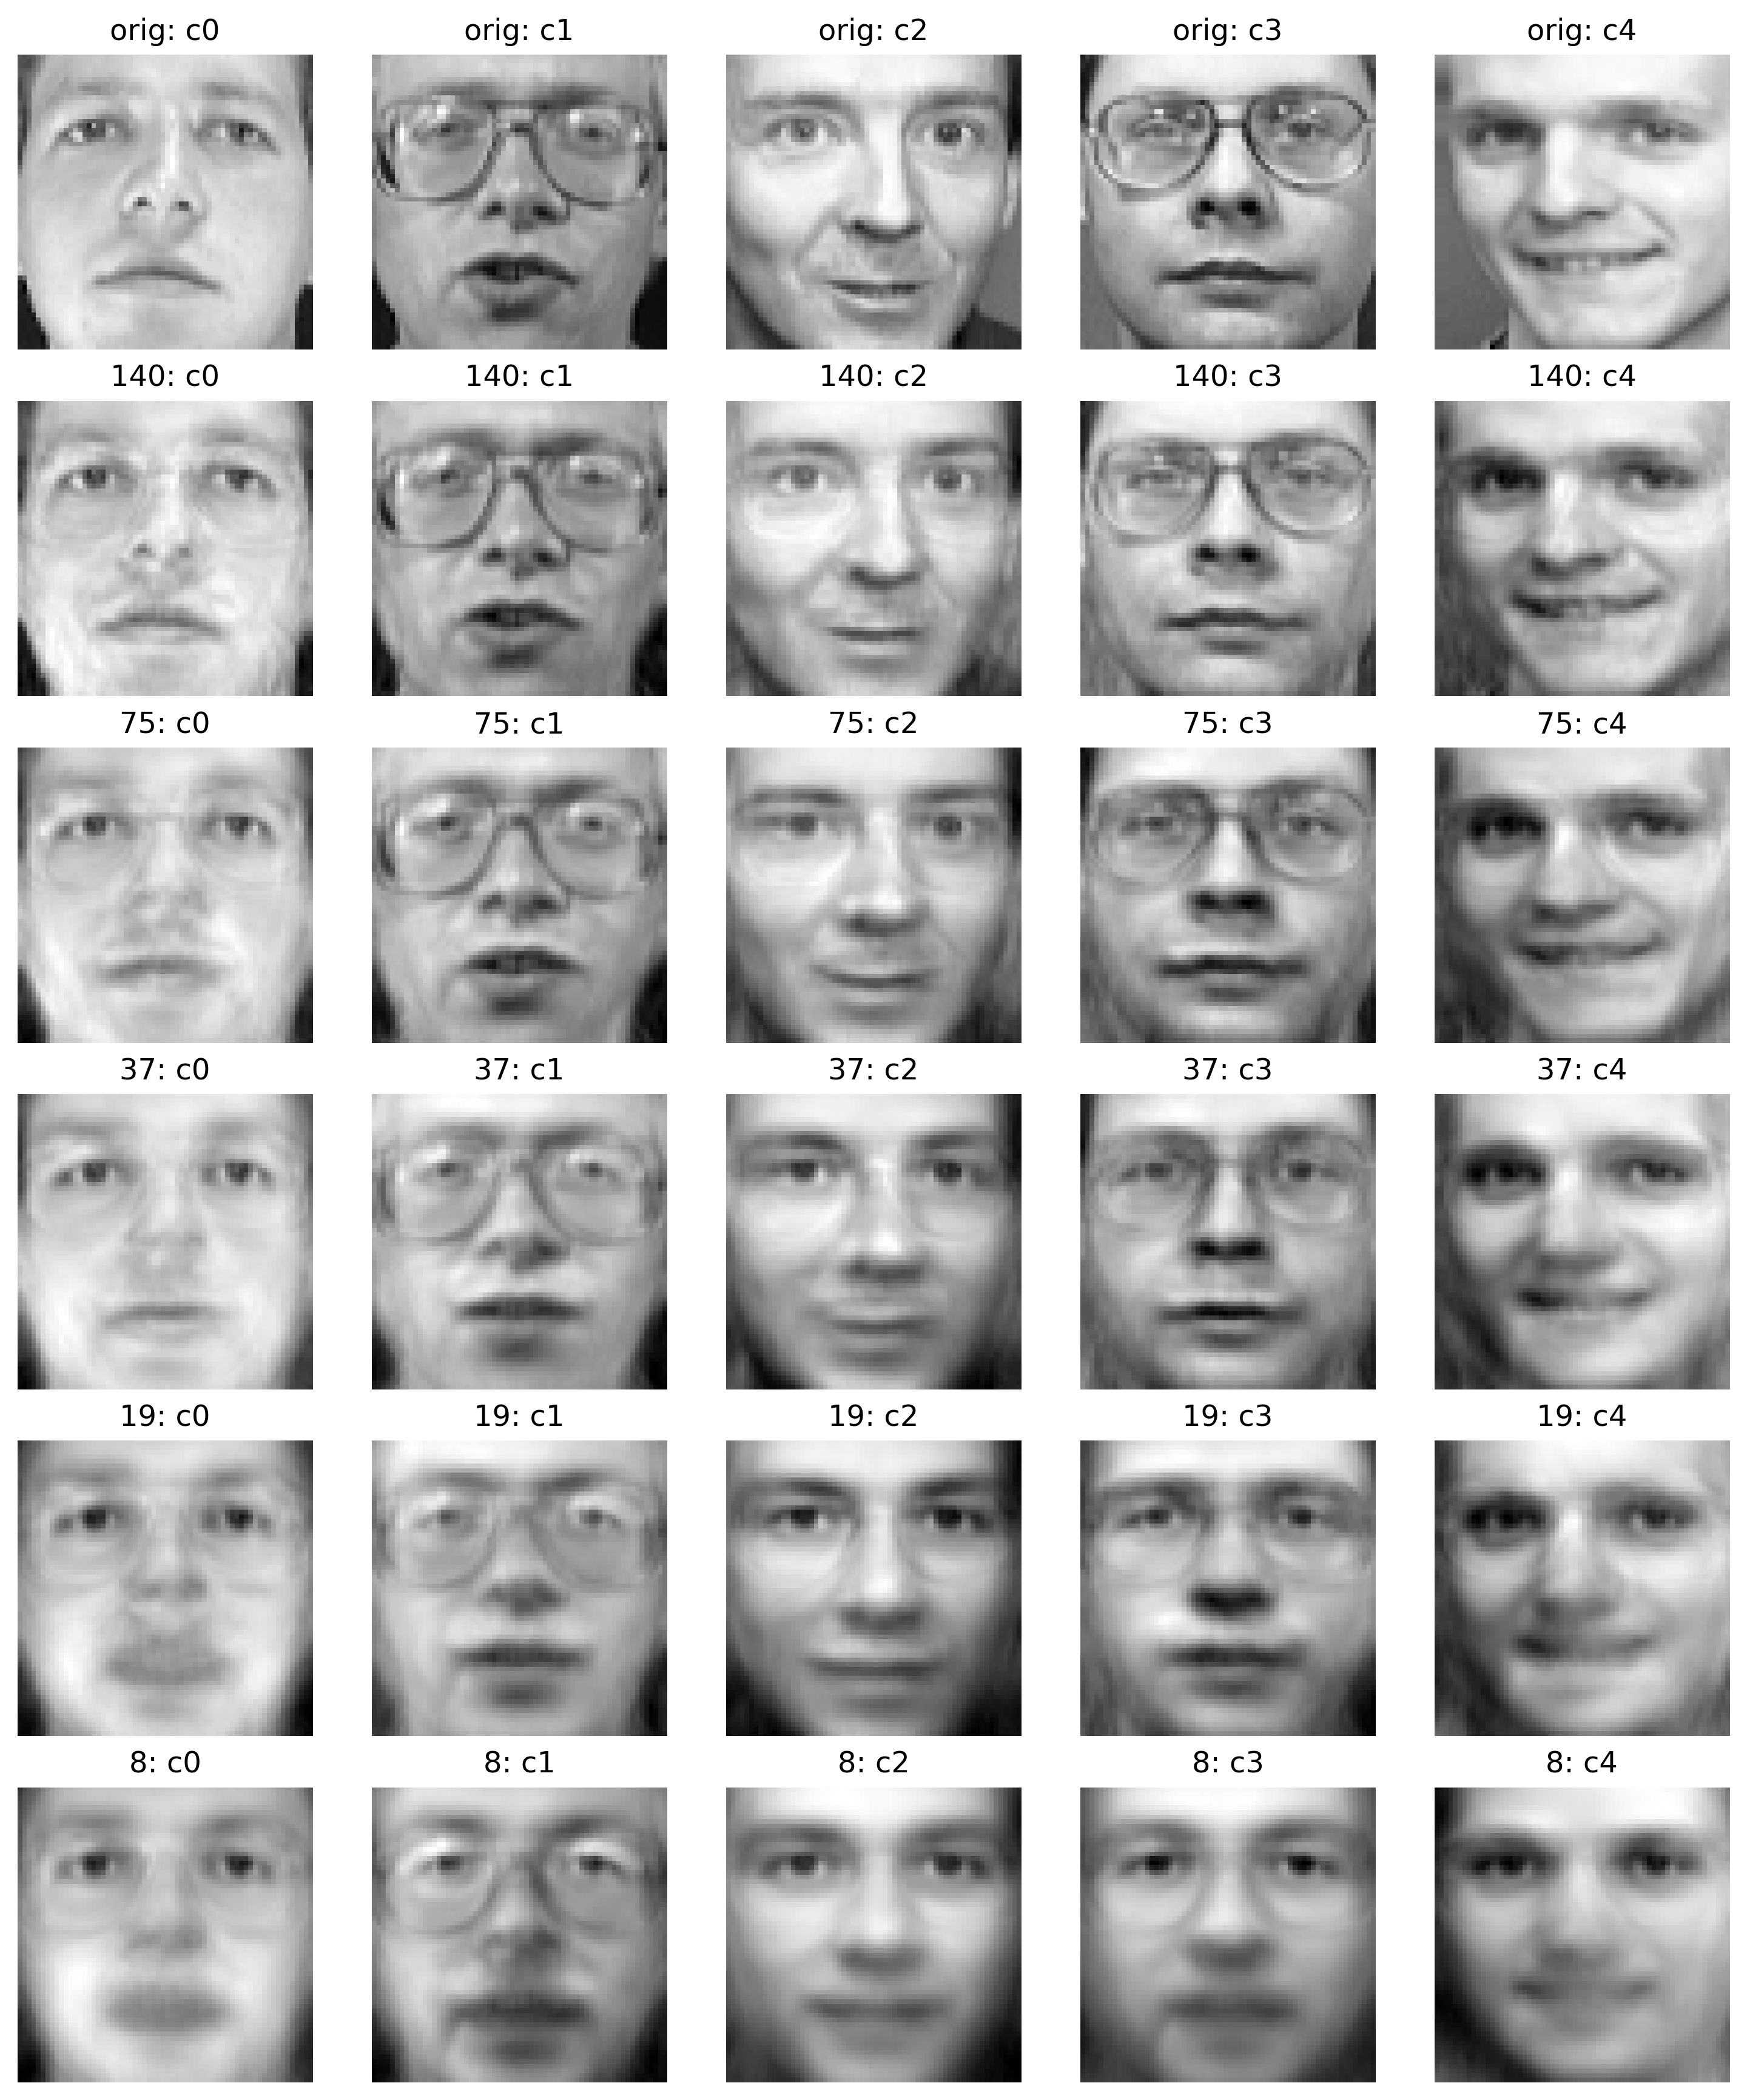

In [45]:
n_row = 1
n_col = 5

sample_images = sample_images[0:5]
sample_titles = sample_titles[0:5]

plotting_images = sample_images
plotting_titles = [title_prefix('orig', t) for t in sample_titles]
candidate_components = [140, 75, 37, 19, 8]
for c in candidate_components:
    print("Fitting and projecting on PCA(n_components={}) ...".format(c))
    start = time.time()
    pca = PCA(n_components=c)
    pca.fit(X)
    X_sample_pca = pca.transform(sample_images)
    X_sample_inv = pca.inverse_transform(X_sample_pca)
    plotting_images = np.concatenate((plotting_images, X_sample_inv), axis=0)
    sample_title_pca = [title_prefix('{}'.format(c), t) for t in sample_titles]
    plotting_titles = np.concatenate((plotting_titles, sample_title_pca), axis=0)
    print("Done in {0:.2f}s".format(time.time() - start))

print("Plotting sample image with different number of PCA conpoments ...")
plot_gallery(plotting_images, plotting_titles, h, w,
    n_row * (len(candidate_components) + 1), n_col)

In [49]:
n_components = 140

print("Fitting PCA by using training data ...")
start = time.time()
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
print("Done in {0:.2f}s".format(time.time() - start))

print("Projecting input data for PCA ...")
start = time.time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Done in {0:.2f}s".format(time.time() - start))

Fitting PCA by using training data ...
Done in 0.23s
Projecting input data for PCA ...
Done in 0.02s


In [50]:
from sklearn.model_selection import GridSearchCV

print("Searching the best parameters for SVC ...")
param_grid = {'C': [1, 5, 10, 50, 100],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, verbose=2, n_jobs=4)
clf = clf.fit(X_train_pca, y_train)
print("Best parameters found by grid search:")
print(clf.best_params_)

Searching the best parameters for SVC ...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters found by grid search:
{'C': 5, 'gamma': 0.001}


In [52]:
start = time.time()
print("Predict test dataset ...")
y_pred = clf.best_estimator_.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred, labels=range(n_targets))
print("Done in {0:.2f}.\n".format(time.time()-start))
print("confusion matrix:")
np.set_printoptions(threshold=2000)
print(cm)

Predict test dataset ...
Done in 0.01.

confusion matrix:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0 0 0

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       0.75      1.00      0.86         3
          17       1.00      1.00      1.00         2
          18       1.00    